#### Set Memory Limit

This problem is because when keras run with gpu, it uses almost all vram. So we needed to give memory_limit for each notebook as shown below

In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
  except RuntimeError as e:
    print(e);

### An end-to-end example: A linear classifier in pure TensorFlow (*from chapter 3.5.4*)
A linear classifier is an affine transformation (prediction = W • input + b) trained to minimize the square of the difference between predictions and the targets.

#### Steps
1. **Create synthetic data**
    1. Generate two classes of random points in 2D plane (1000,2) -- 1000 points with 2D(x,y) coordinates
    1. Stack the two classes into an array of the shape (2000,2)
    1. Generate the corresponding target labels (0 and 1)
    1. Plotting the two point classes
    
1. **Create linear classifier**
    1. Create linear classifier variables W and b
    1. Create forward pass function
    1. Create mean square error loss function
    1. The training step function
    1. The batch training loop
    1. Plot linear function(line separating data)



#### Create synthetic data

##### Generate two classes of random points in 2D

In [27]:
import numpy as np

# number of points per pointcloud
num_samples_per_class = 1000 

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [28]:
print(f'shape:{negative_samples.shape}, 0-th point:{negative_samples[0]}')
print(f'shape:{positive_samples.shape}, 0-th point:{positive_samples[0]}')

shape:(1000, 2), 0-th point:[-1.094047    2.05532573]
shape:(1000, 2), 0-th point:[ 2.71991552 -0.21723634]


##### Stack two classes into an array of the shape (2000,2)

In [29]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [30]:
print(f'shape:{inputs.shape}, 0-th point:{inputs[0]}')
print(f'shape:{inputs.shape}, 1000-th point:{inputs[1000]}')


shape:(2000, 2), 0-th point:[-1.094047   2.0553257]
shape:(2000, 2), 1000-th point:[ 2.7199156  -0.21723634]


##### Generate the corresponding target labels (0 and 1)

In [36]:
targets = np.vstack((np.zeros(shape=(num_samples_per_class, 1), dtype="float32"), 
                    np.ones(shape=(num_samples_per_class, 1), dtype="float32")))

In [37]:
print(f'shape:{targets.shape}, 0-th point:{targets[0]}')
print(f'shape:{targets.shape}, 1000-th point:{targets[1000]}')


shape:(2000, 1), 0-th point:[0.]
shape:(2000, 1), 1000-th point:[1.]


##### Plotting the two point classes


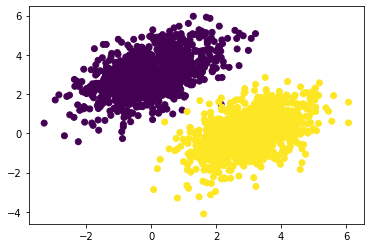

In [42]:
import matplotlib.pyplot as plt 
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()